In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from math import pi

In [2]:
num_players = 50
np.random.seed(42)

In [3]:
# 1. Generate synthetic clusters for offensive and defensive metrics
# Using `make_blobs` to create synthetic clusters for goals, assists, shots on target
# Specify n_features=3 to get three columns
blob_data, _ = make_blobs(n_samples=num_players, centers=3, cluster_std=0.8, n_features=3, random_state=42)
goals, assists, shots_on_target = blob_data.T  # Transpose to separate columns

In [4]:
# Convert to positive integers as goals, assists, and shots on target should be positive
goals = np.abs(goals).astype(int)
assists = np.abs(assists).astype(int)
shots_on_target = np.abs(shots_on_target).astype(int)

In [5]:
# 2. Generate synthetic data for pass completion rate, key passes, tackles, and interceptions
pass_completion_rate = np.clip(uniform.rvs(0.7, 0.3, size=num_players) * 100, 70, 100).round(2)  # Pass completion in %
key_passes = randint.rvs(0, 10, size=num_players)  # Key passes made per game
tackles = randint.rvs(1, 6, size=num_players)  # Tackles per game
interceptions = randint.rvs(1, 5, size=num_players)  # Interceptions per game

In [6]:
# 3. Create a DataFrame to hold the synthetic data
player_data = pd.DataFrame({
    'Player_ID': [f'P{str(i).zfill(3)}' for i in range(1, num_players + 1)],
    'Goals': goals,
    'Assists': assists,
    'Shots_on_Target': shots_on_target,
    'Pass_Completion_Rate (%)': pass_completion_rate,
    'Key_Passes': key_passes,
    'Tackles': tackles,
    'Interceptions': interceptions
})

In [7]:
player_data.head()

,Player_ID,Goals,Assists,Shots_on_Target,Pass_Completion_Rate (%),Key_Passes,Tackles,Interceptions
0,P001,9,6,2,81.24,1,5,2
1,P002,2,8,5,98.52,9,3,1
2,P003,2,6,7,91.96,1,1,1
3,P004,2,9,4,87.96,9,5,3
4,P005,1,6,5,74.68,3,2,2


In [8]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Player_ID                 50 non-null     object 
 1   Goals                     50 non-null     int32  
 2   Assists                   50 non-null     int32  
 3   Shots_on_Target           50 non-null     int32  
 4   Pass_Completion_Rate (%)  50 non-null     float64
 5   Key_Passes                50 non-null     int64  
 6   Tackles                   50 non-null     int64  
 7   Interceptions             50 non-null     int64  
dtypes: float64(1), int32(3), int64(3), object(1)
memory usage: 2.7+ KB


In [9]:
player_data.describe()

,Goals,Assists,Shots_on_Target,Pass_Completion_Rate (%),Key_Passes,Tackles,Interceptions
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,3.720000,7.240000,4.020000,83.377800,4.940000,3.120000,2.440000
std,3.264153,1.098422,2.055257,8.667251,3.079955,1.465801,1.180799
min,0.000000,5.000000,1.000000,70.620000,0.000000,1.000000,1.000000
25%,1.000000,6.250000,2.000000,75.512500,2.000000,2.000000,1.000000
50%,2.000000,7.000000,4.000000,83.080000,6.000000,3.000000,2.000000
75%,8.000000,8.000000,6.000000,89.500000,7.000000,4.000000,4.000000
max,9.000000,9.000000,8.000000,99.100000,9.000000,5.000000,4.000000


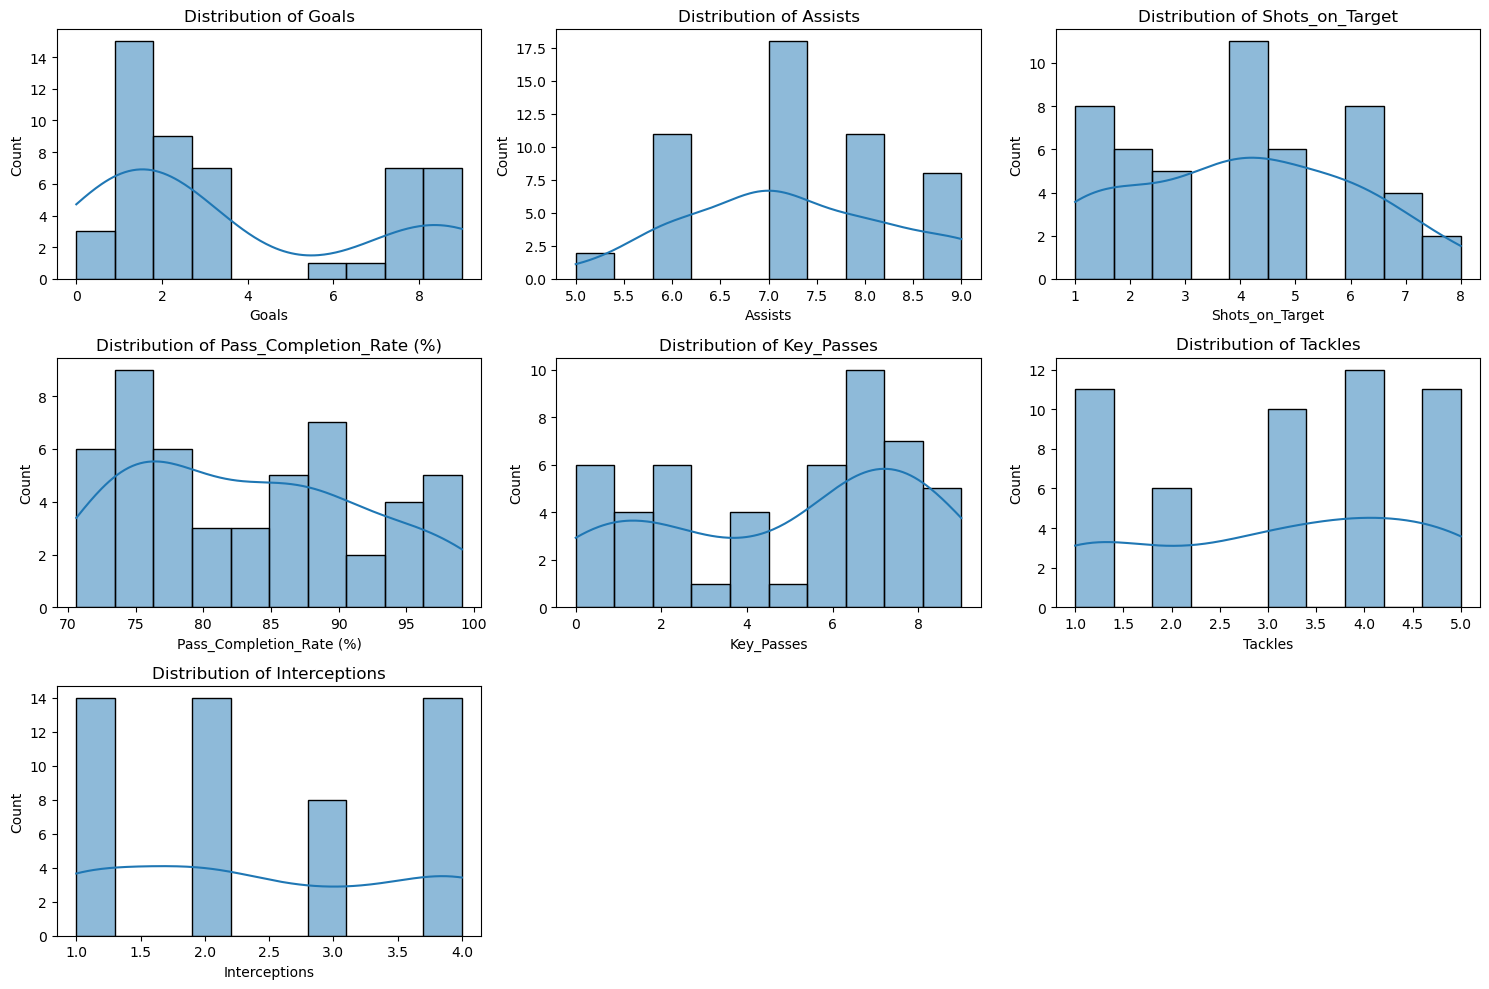

In [10]:
# 3. Distribution Plots for Numerical Features
# Goals, Assists, Shots on Target, Pass Completion Rate, Key Passes, Tackles, Interceptions
num_cols = ['Goals', 'Assists', 'Shots_on_Target', 'Pass_Completion_Rate (%)', 'Key_Passes', 'Tackles', 'Interceptions']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(player_data[col], kde=True, bins=10)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

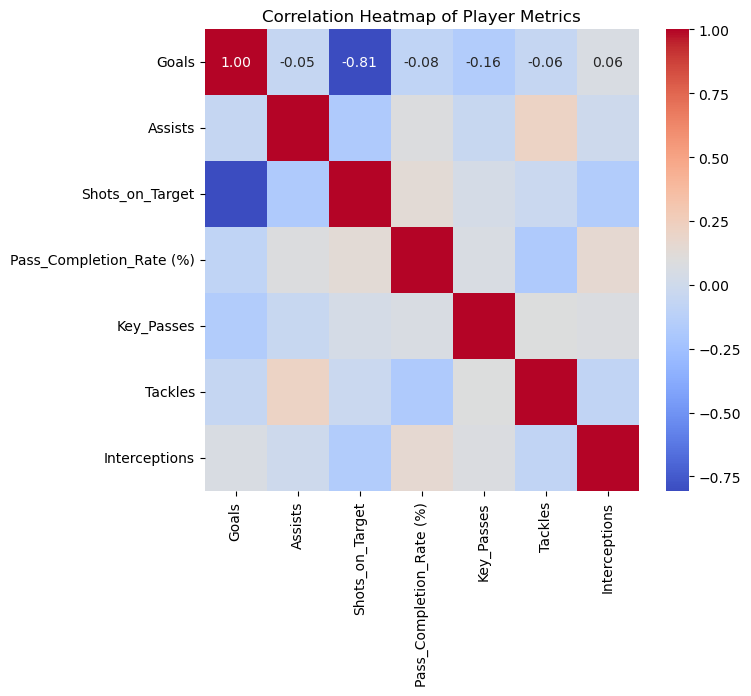

In [11]:
plt.figure(figsize=(7, 6))
correlation_matrix = player_data[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Player Metrics")
plt.show()

## Analysis

we will evaluate players performance based on KPM which is categorised into two\
offensive metrics (e.g., goals, assists, shots on target)\
defensive metrics (e.g., tackles, interceptions), and passing accuracy. 

Result:\
1.Identifying Top Performers in each key category.\
2.Determining Consistency and Reliability of players across games.\
3.Combining Metrics to create a selection score based on customizable criteria for offense, defense, and passing.\

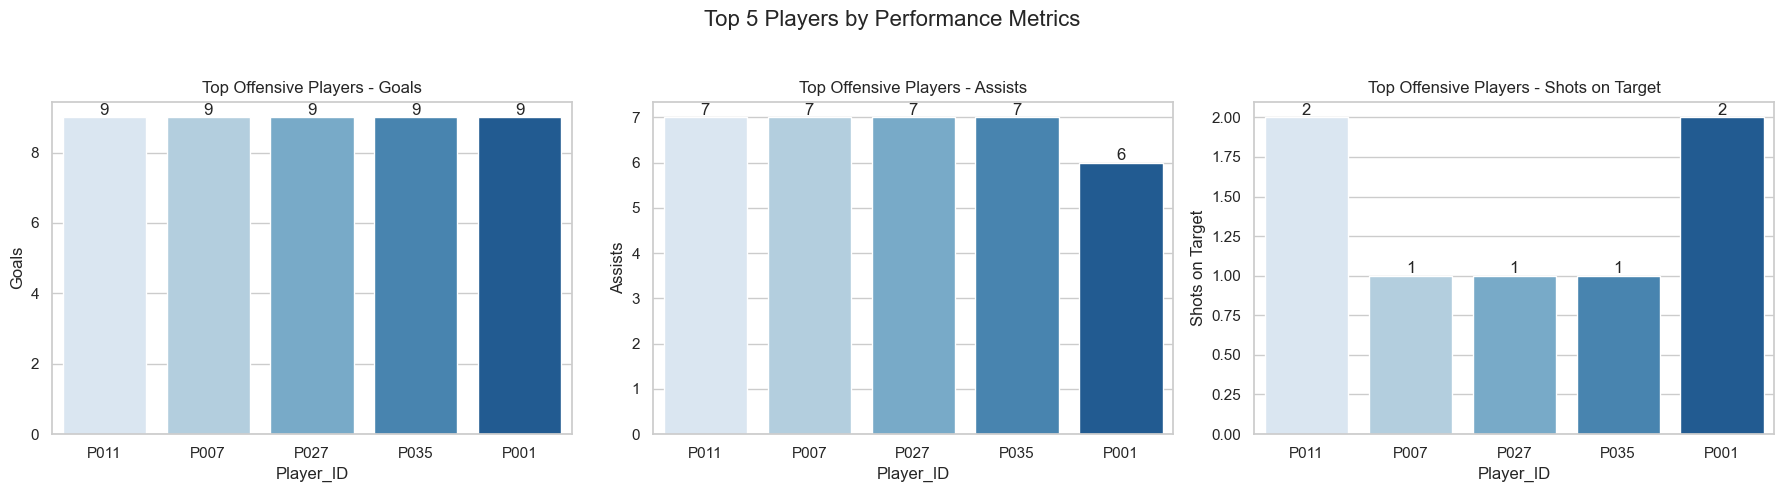

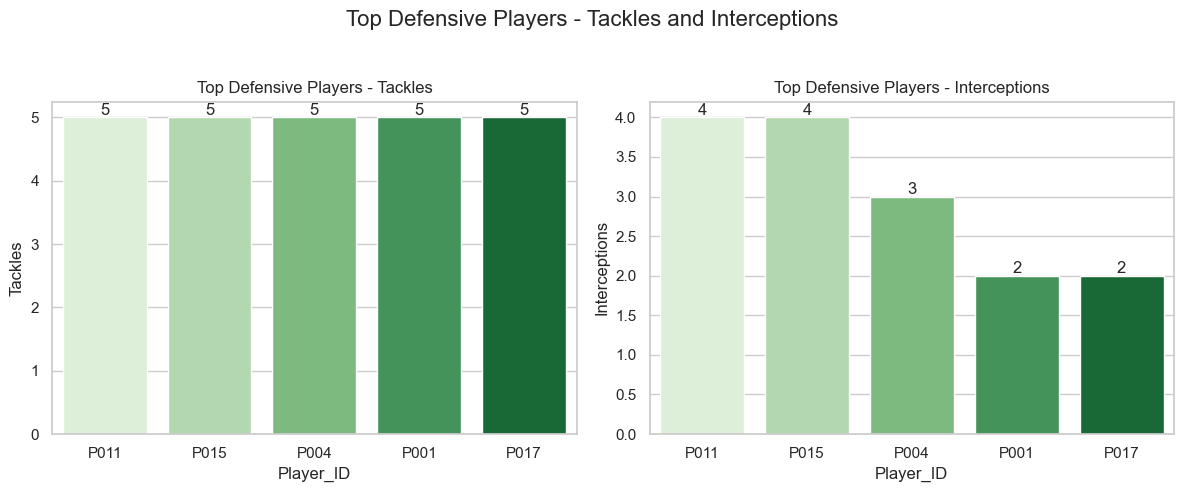

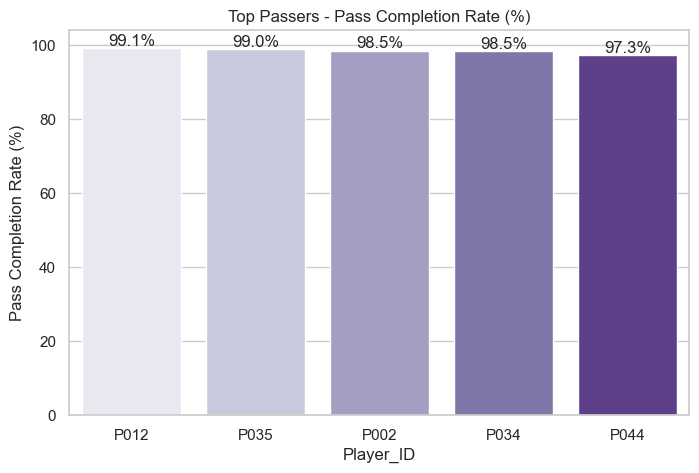

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set(style="whitegrid")

top_offensive_players = player_data.nlargest(5, 'Goals')
top_defensive_players = player_data.nlargest(5, 'Tackles')
top_passers = player_data.nlargest(5, 'Pass_Completion_Rate (%)')


# Limit the top players to the top 5 based on their primary metric in each category for clarity
top_offensive_players = top_offensive_players.nlargest(5, ['Goals', 'Assists', 'Shots_on_Target'])
top_defensive_players = top_defensive_players.nlargest(5, ['Tackles', 'Interceptions'])
top_passers = top_passers.nlargest(5, 'Pass_Completion_Rate (%)')

# 1. Top Offensive Players - Goals, Assists, Shots on Target
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Top 5 Players by Performance Metrics", fontsize=16)

# Plot Goals
sns.barplot(data=top_offensive_players, x='Player_ID', y='Goals', ax=ax[0], palette='Blues')
ax[0].set_title("Top Offensive Players - Goals")
for p in ax[0].patches:
    ax[0].annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')
ax[0].set_ylabel("Goals")

# Plot Assists
sns.barplot(data=top_offensive_players, x='Player_ID', y='Assists', ax=ax[1], palette='Blues')
ax[1].set_title("Top Offensive Players - Assists")
for p in ax[1].patches:
    ax[1].annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')
ax[1].set_ylabel("Assists")

# Plot Shots on Target
sns.barplot(data=top_offensive_players, x='Player_ID', y='Shots_on_Target', ax=ax[2], palette='Blues')
ax[2].set_title("Top Offensive Players - Shots on Target")
for p in ax[2].patches:
    ax[2].annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')
ax[2].set_ylabel("Shots on Target")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for title
plt.show()

# 2. Top Defensive Players - Tackles and Interceptions
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Top Defensive Players - Tackles and Interceptions", fontsize=16)

# Plot Tackles
sns.barplot(data=top_defensive_players, x='Player_ID', y='Tackles', ax=ax[0], palette='Greens')
ax[0].set_title("Top Defensive Players - Tackles")
for p in ax[0].patches:
    ax[0].annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')
ax[0].set_ylabel("Tackles")

# Plot Interceptions
sns.barplot(data=top_defensive_players, x='Player_ID', y='Interceptions', ax=ax[1], palette='Greens')
ax[1].set_title("Top Defensive Players - Interceptions")
for p in ax[1].patches:
    ax[1].annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')
ax[1].set_ylabel("Interceptions")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for title
plt.show()

# 3. Top Passers - Pass Completion Rate (%)
plt.figure(figsize=(8, 5))
plt.title("Top Passers - Pass Completion Rate (%)")

sns.barplot(data=top_passers, x='Player_ID', y='Pass_Completion_Rate (%)', palette='Purples')
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.ylabel("Pass Completion Rate (%)")
plt.show()


Components of the Selection Score
Offensive Score:

Metrics Included:
Goals
Assists
Shots on Target
Calculation: The average of these three metrics gives an indication of a player's offensive contribution. In this case, it’s calculated as:
Offensive_Score
=
Goals
+
Assists
+
Shots on Target
3
Offensive_Score= 
3
Goals+Assists+Shots on Target
​
 
Defensive Score:

Metrics Included:
Tackles
Interceptions
Calculation: The average of these two metrics reflects a player’s defensive capabilities:
Defensive_Score
=
Tackles
+
Interceptions
2
Defensive_Score= 
2
Tackles+Interceptions
​
 
Passing Score:

Metric Included:
Pass Completion Rate (%)
Calculation: This score is normalized by dividing by 100 to put it on a scale from 0 to 1:
Passing_Score
=
Pass Completion Rate
100
Passing_Score= 
100
Pass Completion Rate
​
 
Composite Selection Score Calculation
The Selection Score combines these three scores, assigning specific weights to reflect their importance in overall player evaluation:

Weighting:
Offensive contributions are weighted at 40%.
Defensive contributions are weighted at 30%.
Passing contributions are weighted at 30%.
The formula used is:

Selection_Score
=
(
Offensive_Score
×
0.4
)
+
(
Defensive_Score
×
0.3
)
+
(
Passing_Score
×
0.3
)
Selection_Score=(Offensive_Score×0.4)+(Defensive_Score×0.3)+(Passing_Score×0.3)

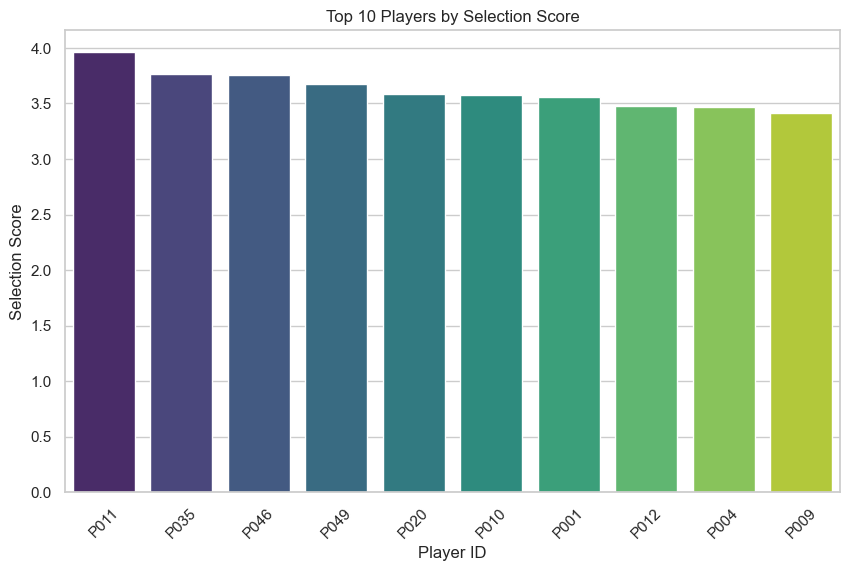

In [13]:
# 2. Create a Composite Score for Player Selection
# Assign weights to each metric to calculate a selection score
# Example: 40% offense, 30% defense, 30% passing

# Normalize each metric to a common scale
player_data['Offensive_Score'] = (player_data['Goals'] + player_data['Assists'] + player_data['Shots_on_Target']) / 3
player_data['Defensive_Score'] = (player_data['Tackles'] + player_data['Interceptions']) / 2
player_data['Passing_Score'] = player_data['Pass_Completion_Rate (%)'] / 100

# Calculate weighted score for each player
player_data['Selection_Score'] = (
    player_data['Offensive_Score'] * 0.4 +
    player_data['Defensive_Score'] * 0.3 +
    player_data['Passing_Score'] * 0.3
    )

# 4. Visualization: Top 10 Players by Selection Score
top_players = player_data.nlargest(10, 'Selection_Score')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_players, x='Player_ID', y='Selection_Score', palette='viridis')
plt.title("Top 10 Players by Selection Score")
plt.xlabel("Player ID")
plt.ylabel("Selection Score")
plt.xticks(rotation=45)
plt.show()

In [14]:
# 5. Further Analysis
# Correlation analysis of selection score with individual metrics
print("\nCorrelation of Selection Score with Performance Metrics:")
print(player_data[['Selection_Score', 'Goals', 'Assists', 'Shots_on_Target', 
                  'Tackles', 'Interceptions', 'Pass_Completion_Rate (%)']].corr()['Selection_Score'].sort_values(ascending=False))


Correlation of Selection Score with Performance Metrics:
Selection_Score             1.000000
Goals                       0.541536
Tackles                     0.534422
Interceptions               0.392244
Assists                     0.327657
Pass_Completion_Rate (%)    0.073020
Shots_on_Target            -0.360675
Name: Selection_Score, dtype: float64


In [15]:
data = player_data.copy()

1. Team Averages for Comparison:
Calculate team averages for each metric to provide a benchmark.

In [16]:
# 1. Calculate Team Averages for Each KPM
team_averages = data[['Goals', 'Assists', 'Shots_on_Target', 'Pass_Completion_Rate (%)', 
                      'Key_Passes', 'Tackles', 'Interceptions']].mean()
print("Team Averages:\n", team_averages)

Team Averages:
 Goals                        3.7200
Assists                      7.2400
Shots_on_Target              4.0200
Pass_Completion_Rate (%)    83.3778
Key_Passes                   4.9400
Tackles                      3.1200
Interceptions                2.4400
dtype: float64


2. Z-Scores for Benchmarking:

Calculate Z-scores for each player’s metrics, measuring their deviation from the team average. Positive Z-scores indicate above-average performance, while negative scores show below-average performance.

In [17]:
# 2. Calculate Z-Scores for Benchmarking
# Z-scores tell us how far a player's performance is from the team average (in standard deviations)
z_score_data = data[['Goals', 'Assists', 'Shots_on_Target', 'Pass_Completion_Rate (%)', 
                     'Key_Passes', 'Tackles', 'Interceptions']].apply(zscore)

In [18]:
# Adding Z-scores to the main dataframe for each metric
for col in z_score_data.columns:
    data[f'{col}_Z_Score'] = z_score_data[col]

print("\nPlayer Z-Scores for Each Metric:")
print(data[[f'{col}_Z_Score' for col in z_score_data.columns]])


Player Z-Scores for Each Metric:
    Goals_Z_Score  Assists_Z_Score  Shots_on_Target_Z_Score  \
0        1.633994        -1.140353                -0.992824   
1       -0.532286         0.698926                 0.481667   
2       -0.532286        -1.140353                 1.464661   
3       -0.532286         1.618566                -0.009830   
4       -0.841754        -1.140353                 0.481667   
5       -0.841754        -1.140353                 1.956158   
6        1.633994        -0.220714                -1.484321   
7       -0.532286         1.618566                 0.481667   
8       -0.222817         1.618566                 0.973164   
9        1.324525        -0.220714                -0.501327   
10       1.633994        -0.220714                -0.992824   
11       1.324525        -0.220714                -1.484321   
12      -0.532286        -1.140353                 0.481667   
13      -1.151223        -1.140353                 0.973164   
14      -0.841754    

3. Radar Chart for Visualizing Player Performance:

The radar chart compares an individual player’s metrics against the team average, highlighting areas where the player excels or lags relative to the team.

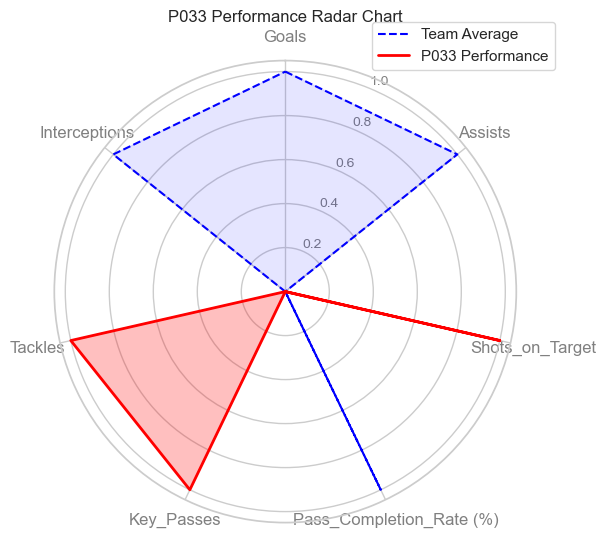

In [38]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from math import pi

# Assuming `team_averages` and `player_stats` are already calculated and available
# Select a player for detailed visualization (example: 'Player_ID' = 'P001')
player_id = 'P033'
player_stats = data[data['Player_ID'] == player_id][['Goals', 'Assists', 'Shots_on_Target', 
                                                     'Pass_Completion_Rate (%)', 'Key_Passes', 'Tackles', 'Interceptions']].values.flatten()

# Scale the team averages and player stats to range [0, 1] for radar chart comparison
scaler = MinMaxScaler()
scaled_team_averages = scaler.fit_transform([team_averages.values, player_stats])[0]
scaled_player_stats = scaler.transform([player_stats])[0]

# Radar chart setup
categories = list(team_averages.index)
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Close the loop

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Plot team averages
team_values = np.concatenate((scaled_team_averages, [scaled_team_averages[0]]))
ax.plot(angles, team_values, color='blue', linewidth=1.5, linestyle='--', label="Team Average")
ax.fill(angles, team_values, color='blue', alpha=0.1)

# Plot player's performance
player_values = np.concatenate((scaled_player_stats, [scaled_player_stats[0]]))
ax.plot(angles, player_values, color='red', linewidth=2, label=f"{player_id} Performance")
ax.fill(angles, player_values, color='red', alpha=0.25)

# Add category labels
plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(color='grey', size=10)
plt.title(f"{player_id} Performance Radar Chart")

# Show legend explicitly with custom labels
ax.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1))
plt.show()


4. Consistency Analysis:

By calculating the standard deviation of each player’s metrics, we can assess their consistency. Players with lower standard deviations are more consistent, which can be a desirable trait in certain roles.

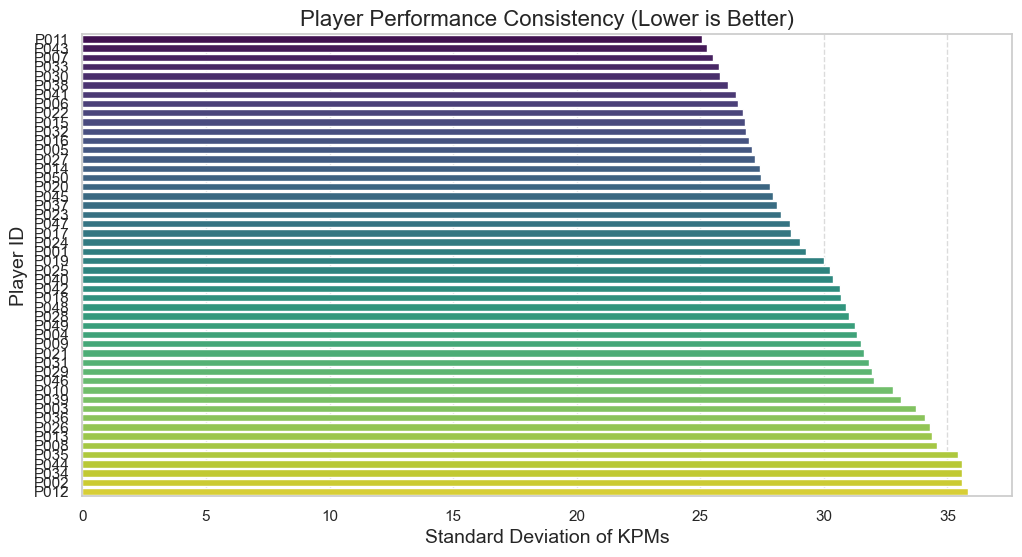

In [20]:
# 4. Consistency Analysis: Standard Deviation of KPMs
# Calculate each player’s KPM standard deviation to gauge consistency
data['Performance_Consistency'] = data[['Goals', 'Assists', 'Shots_on_Target', 
                                        'Pass_Completion_Rate (%)', 'Key_Passes', 'Tackles', 'Interceptions']].std(axis=1)

# Sort data by Performance Consistency for better visualization
sorted_data = data.sort_values(by='Performance_Consistency')

plt.figure(figsize=(12, 6))
sns.barplot(x='Performance_Consistency', y='Player_ID', data=sorted_data, palette='viridis')

# Adding titles and labels
plt.title('Player Performance Consistency (Lower is Better)', fontsize=16)
plt.xlabel('Standard Deviation of KPMs', fontsize=14)
plt.ylabel('Player ID', fontsize=14)

# Show grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

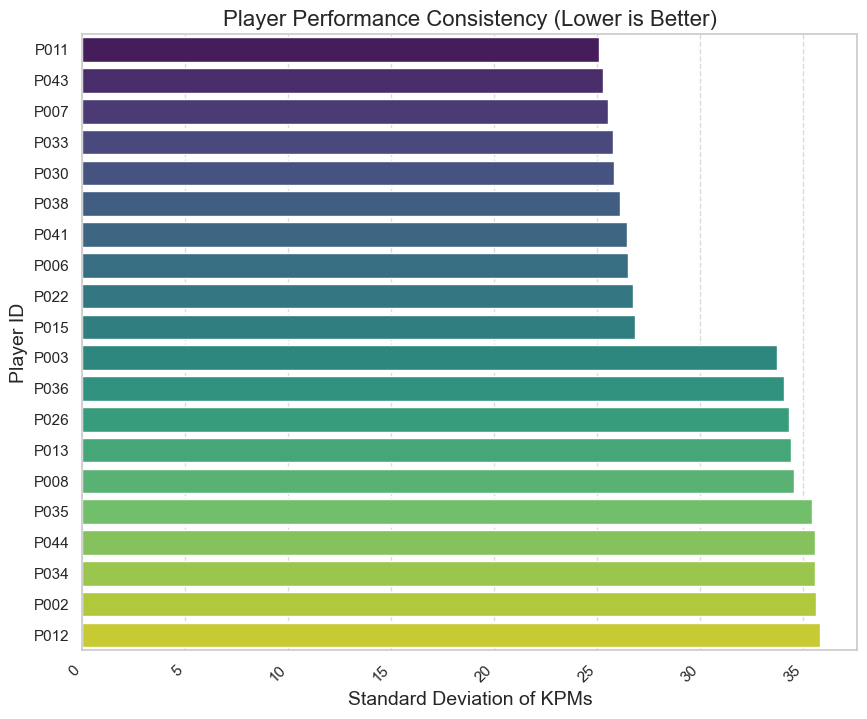

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Limit the data to the top and bottom 10 players by performance consistency
top_bottom_players = pd.concat([sorted_data.head(10), sorted_data.tail(10)])

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Performance_Consistency', y='Player_ID', data=top_bottom_players, palette='viridis')

# Adding titles and labels
plt.title('Player Performance Consistency (Lower is Better)', fontsize=16)
plt.xlabel('Standard Deviation of KPMs', fontsize=14)
plt.ylabel('Player ID', fontsize=14)

# Adjust label rotation and add grid for readability
plt.xticks(rotation=45, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


5. Clustering for Archetype Identification:

Clustering players based on KPMs helps identify player archetypes (e.g., attackers, defenders, playmakers), aiding in role-specific analysis.

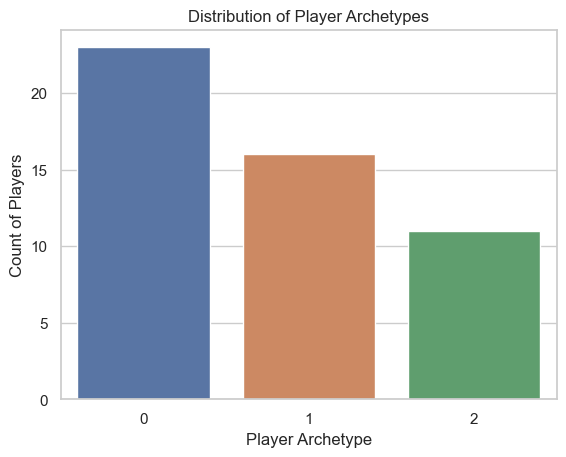

In [21]:
# 5. Clustering to Find Player Archetypes
from sklearn.cluster import KMeans

# Select normalized data for clustering
kpm_data = data[['Goals', 'Assists', 'Shots_on_Target', 'Pass_Completion_Rate (%)', 'Key_Passes', 'Tackles', 'Interceptions']]
kpm_data_normalized = scaler.fit_transform(kpm_data)

# Using KMeans to cluster players into archetypes
kmeans = KMeans(n_clusters=3, random_state=42)
data['Player_Archetype'] = kmeans.fit_predict(kpm_data_normalized)

# Visualize Archetypes Distribution
sns.countplot(data=data, x='Player_Archetype')
plt.title("Distribution of Player Archetypes")
plt.xlabel("Player Archetype")
plt.ylabel("Count of Players")
plt.show()

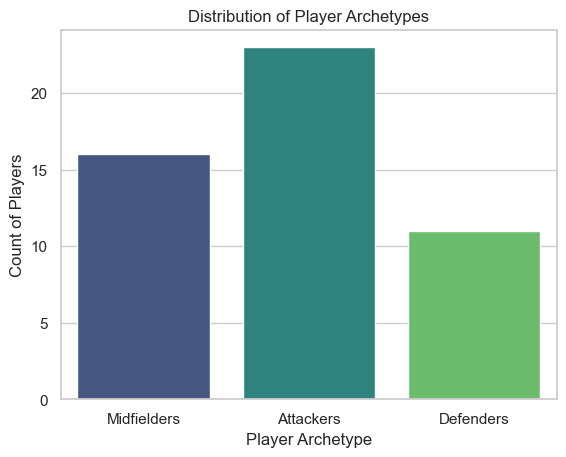

In [37]:
# Map clusters to descriptive archetypes after analyzing cluster characteristics
archetype_mapping = {0: "Attackers", 1: "Midfielders", 2: "Defenders"}
data['Player_Archetype'] = data['Player_Archetype'].map(archetype_mapping)

# Visualize the updated distribution with names
sns.countplot(data=data, x='Player_Archetype', palette='viridis')
plt.title("Distribution of Player Archetypes")
plt.xlabel("Player Archetype")
plt.ylabel("Count of Players")
plt.show()


### Interpretation for Coaches
Top Performers: By comparing Z-scores and radar charts, coaches can identify players excelling in specific areas.\
Consistency: Reliable, consistent players can be prioritized for key roles.\
Archetypes: Clustering provides a role-based grouping, helping coaches understand each player’s natural strengths and how they fit into the team.